In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model, losses
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time  # Add time module
from tensorflow.keras.preprocessing.image import smart_resize

# Define the weighted VAE loss function
def vae_loss(inputs, outputs, mu, log_var):
    reconstruction_loss = tf.reduce_mean(losses.binary_crossentropy(inputs, outputs))
    kl_loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mu) - tf.exp(log_var))
    return reconstruction_loss + 0.25 * kl_loss  # Weight reconstruction more heavily

def multiscale_encoder(input_shape):
    inputs = layers.Input(shape=input_shape)

# Multi-scale convolution 
    branch_3x3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    branch_5x5 = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(inputs)
    branch_7x7 = layers.Conv2D(32, (7, 7), activation='relu', padding='same')(inputs)

    # Concatenate feature maps from all branches
    x = layers.Concatenate()([branch_3x3, branch_5x5, branch_7x7])

    # Downsampling and deeper feature extraction
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Flatten()(x)

    # Latent space
    mu = layers.Dense(128)(x)
    log_var = layers.Dense(128)(x)

    # Sampling
    def sampling(args):
        mu, log_var = args
        epsilon = tf.random.normal(shape=tf.shape(mu))
        return mu + tf.exp(0.5 * log_var) * epsilon

    z = layers.Lambda(sampling)([mu, log_var])

    return Model(inputs, [z, mu, log_var], name='multiscale_encoder')

# Decoder for the VAE
def build_decoder(latent_dim):
    decoder_input = layers.Input(shape=(latent_dim,))
    x = layers.Dense(64 * 64 * 128, activation='relu')(decoder_input)
    x = layers.Reshape((64, 64, 128))(x)
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    return Model(decoder_input, outputs, name='decoder')

# Build the full VAE
def build_vae(input_shape):
    encoder = multiscale_encoder(input_shape)
    decoder = build_decoder(latent_dim=128)

    inputs = layers.Input(shape=input_shape)
    z, mu, log_var = encoder(inputs)
    reconstructed = decoder(z)

    vae = Model(inputs, reconstructed, name='vae')
    vae.add_loss(vae_loss(inputs, reconstructed, mu, log_var))
    vae.compile(optimizer='adam')

    return vae, encoder, decoder



C:\Users\priya\anaconda3\envs\anacondagpu\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Processing Test Image 1/8...
Model weights reset.
  Adaptation Epoch 1/250 completed.
  Adaptation Epoch 2/250 completed.
  Adaptation Epoch 3/250 completed.
  Adaptation Epoch 4/250 completed.
  Adaptation Epoch 5/250 completed.
  Adaptation Epoch 6/250 completed.
  Adaptation Epoch 7/250 completed.
  Adaptation Epoch 8/250 completed.
  Adaptation Epoch 9/250 completed.
  Adaptation Epoch 10/250 completed.
  Adaptation Epoch 11/250 completed.
  Adaptation Epoch 12/250 completed.
  Adaptation Epoch 13/250 completed.
  Adaptation Epoch 14/250 completed.
  Adaptation Epoch 15/250 completed.
  Adaptation Epoch 16/250 completed.
  Adaptation Epoch 17/250 completed.
  Adaptation Epoch 18/250 completed.
  Adaptation Epoch 19/250 completed.
  Adaptation Epoch 20/250 completed.
  Adaptation Epoch 21/250 completed.
  Adaptation Epoch 22/250 completed.
  Adaptation Epoch 23/250 completed.
  Adaptation Epoch 24/250 completed.
  Adaptation Epoch 25/250 completed.
  Adaptation Epoch 26/250 complete

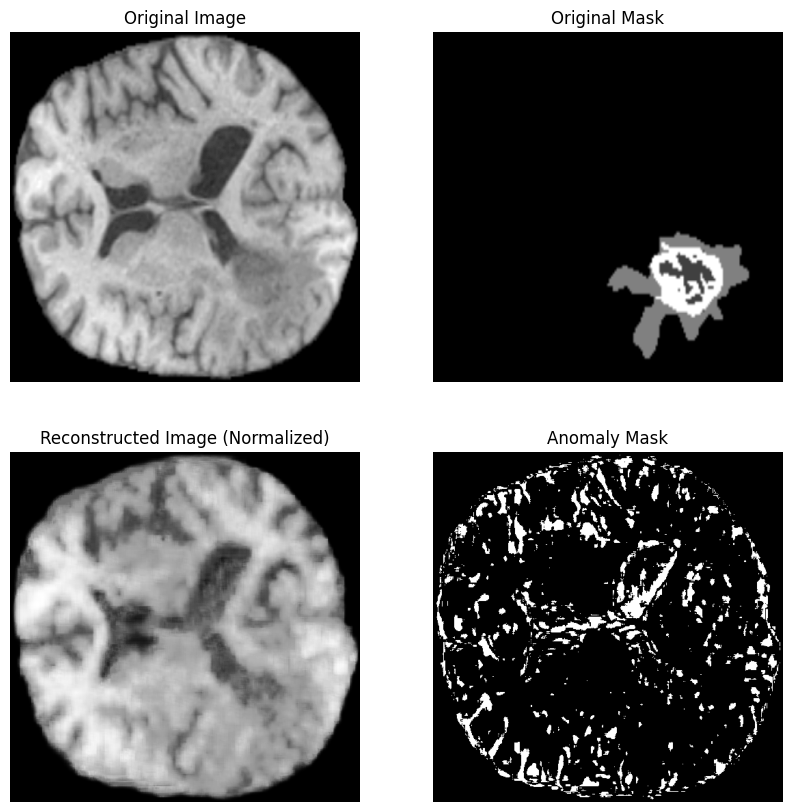

Processing Test Image 2/8...
Model weights reset.
  Adaptation Epoch 1/250 completed.
  Adaptation Epoch 2/250 completed.
  Adaptation Epoch 3/250 completed.
  Adaptation Epoch 4/250 completed.
  Adaptation Epoch 5/250 completed.
  Adaptation Epoch 6/250 completed.
  Adaptation Epoch 7/250 completed.
  Adaptation Epoch 8/250 completed.
  Adaptation Epoch 9/250 completed.
  Adaptation Epoch 10/250 completed.
  Adaptation Epoch 11/250 completed.
  Adaptation Epoch 12/250 completed.
  Adaptation Epoch 13/250 completed.
  Adaptation Epoch 14/250 completed.
  Adaptation Epoch 15/250 completed.
  Adaptation Epoch 16/250 completed.
  Adaptation Epoch 17/250 completed.
  Adaptation Epoch 18/250 completed.
  Adaptation Epoch 19/250 completed.
  Adaptation Epoch 20/250 completed.
  Adaptation Epoch 21/250 completed.
  Adaptation Epoch 22/250 completed.
  Adaptation Epoch 23/250 completed.
  Adaptation Epoch 24/250 completed.
  Adaptation Epoch 25/250 completed.
  Adaptation Epoch 26/250 complete

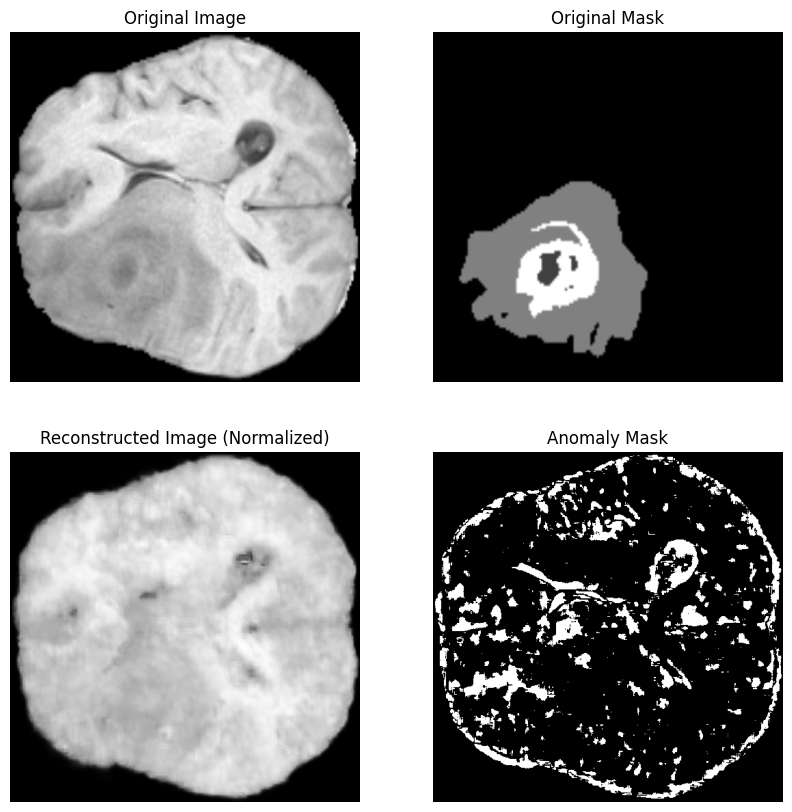

Processing Test Image 3/8...
Model weights reset.
  Adaptation Epoch 1/250 completed.
  Adaptation Epoch 2/250 completed.
  Adaptation Epoch 3/250 completed.
  Adaptation Epoch 4/250 completed.
  Adaptation Epoch 5/250 completed.
  Adaptation Epoch 6/250 completed.
  Adaptation Epoch 7/250 completed.
  Adaptation Epoch 8/250 completed.
  Adaptation Epoch 9/250 completed.
  Adaptation Epoch 10/250 completed.
  Adaptation Epoch 11/250 completed.
  Adaptation Epoch 12/250 completed.
  Adaptation Epoch 13/250 completed.
  Adaptation Epoch 14/250 completed.
  Adaptation Epoch 15/250 completed.
  Adaptation Epoch 16/250 completed.
  Adaptation Epoch 17/250 completed.
  Adaptation Epoch 18/250 completed.
  Adaptation Epoch 19/250 completed.
  Adaptation Epoch 20/250 completed.
  Adaptation Epoch 21/250 completed.
  Adaptation Epoch 22/250 completed.
  Adaptation Epoch 23/250 completed.
  Adaptation Epoch 24/250 completed.
  Adaptation Epoch 25/250 completed.
  Adaptation Epoch 26/250 complete

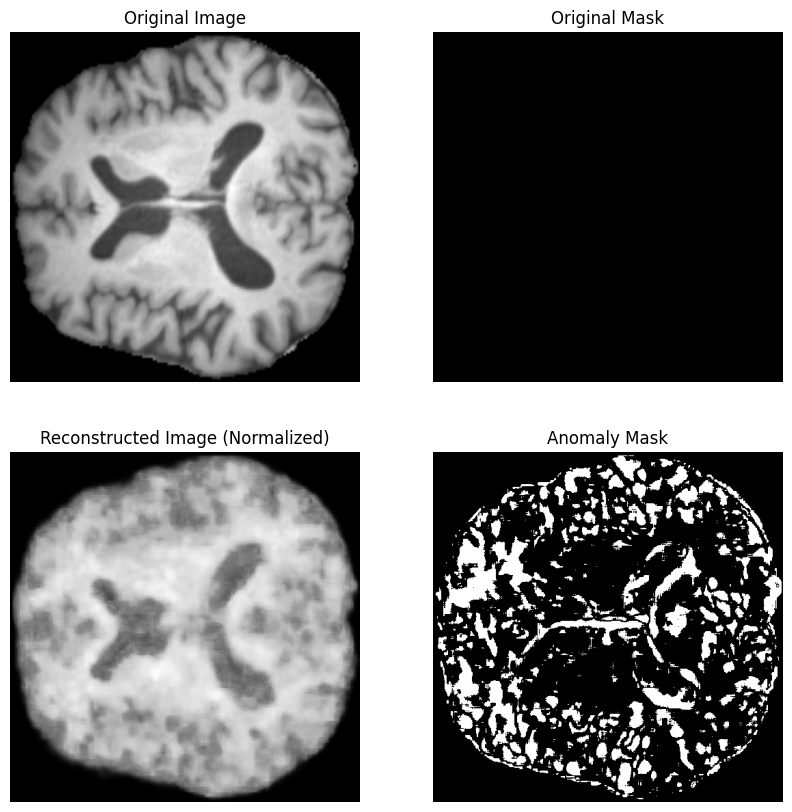

Processing Test Image 4/8...
Model weights reset.
  Adaptation Epoch 1/250 completed.
  Adaptation Epoch 2/250 completed.
  Adaptation Epoch 3/250 completed.
  Adaptation Epoch 4/250 completed.
  Adaptation Epoch 5/250 completed.
  Adaptation Epoch 6/250 completed.
  Adaptation Epoch 7/250 completed.
  Adaptation Epoch 8/250 completed.
  Adaptation Epoch 9/250 completed.
  Adaptation Epoch 10/250 completed.
  Adaptation Epoch 11/250 completed.
  Adaptation Epoch 12/250 completed.
  Adaptation Epoch 13/250 completed.
  Adaptation Epoch 14/250 completed.
  Adaptation Epoch 15/250 completed.
  Adaptation Epoch 16/250 completed.
  Adaptation Epoch 17/250 completed.
  Adaptation Epoch 18/250 completed.
  Adaptation Epoch 19/250 completed.
  Adaptation Epoch 20/250 completed.
  Adaptation Epoch 21/250 completed.
  Adaptation Epoch 22/250 completed.
  Adaptation Epoch 23/250 completed.
  Adaptation Epoch 24/250 completed.
  Adaptation Epoch 25/250 completed.
  Adaptation Epoch 26/250 complete

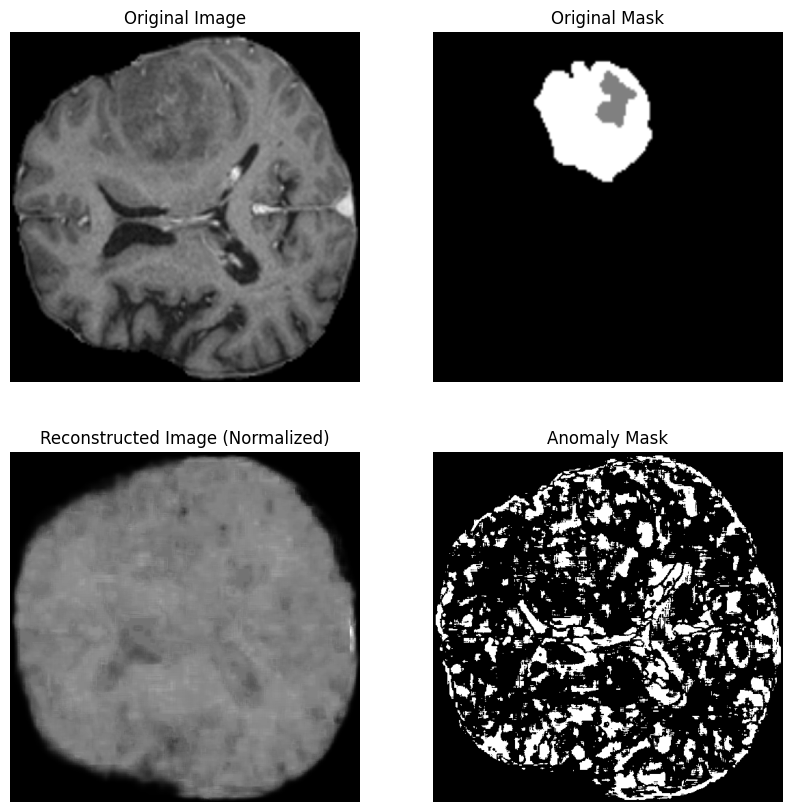

Processing Test Image 5/8...
Model weights reset.
  Adaptation Epoch 1/250 completed.
  Adaptation Epoch 2/250 completed.
  Adaptation Epoch 3/250 completed.
  Adaptation Epoch 4/250 completed.
  Adaptation Epoch 5/250 completed.
  Adaptation Epoch 6/250 completed.
  Adaptation Epoch 7/250 completed.
  Adaptation Epoch 8/250 completed.
  Adaptation Epoch 9/250 completed.
  Adaptation Epoch 10/250 completed.
  Adaptation Epoch 11/250 completed.
  Adaptation Epoch 12/250 completed.
  Adaptation Epoch 13/250 completed.
  Adaptation Epoch 14/250 completed.
  Adaptation Epoch 15/250 completed.
  Adaptation Epoch 16/250 completed.
  Adaptation Epoch 17/250 completed.
  Adaptation Epoch 18/250 completed.
  Adaptation Epoch 19/250 completed.
  Adaptation Epoch 20/250 completed.
  Adaptation Epoch 21/250 completed.
  Adaptation Epoch 22/250 completed.
  Adaptation Epoch 23/250 completed.
  Adaptation Epoch 24/250 completed.
  Adaptation Epoch 25/250 completed.
  Adaptation Epoch 26/250 complete

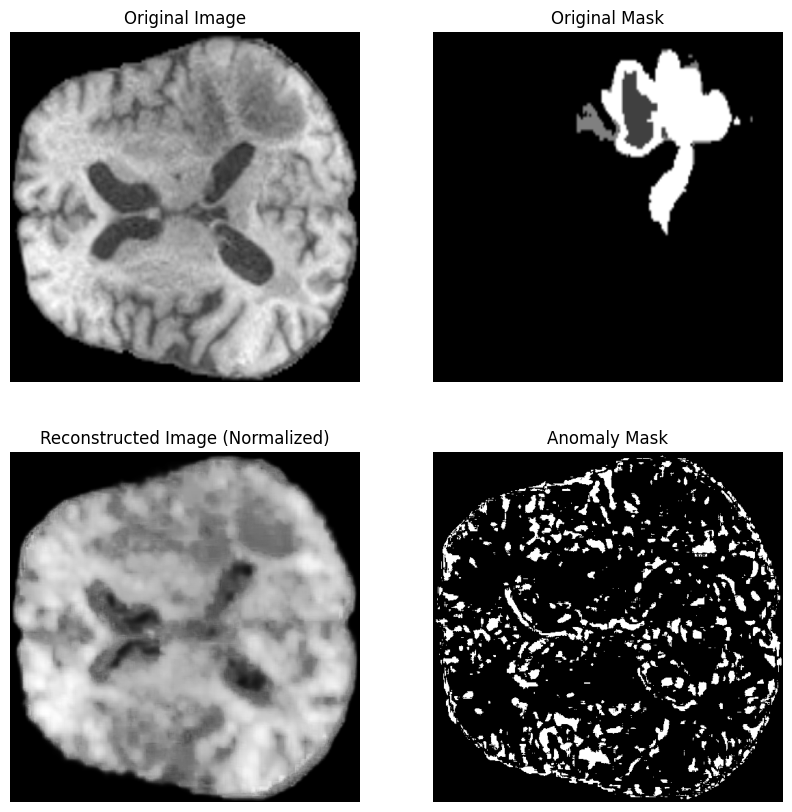

Processing Test Image 6/8...
Model weights reset.
  Adaptation Epoch 1/250 completed.
  Adaptation Epoch 2/250 completed.
  Adaptation Epoch 3/250 completed.
  Adaptation Epoch 4/250 completed.
  Adaptation Epoch 5/250 completed.
  Adaptation Epoch 6/250 completed.
  Adaptation Epoch 7/250 completed.
  Adaptation Epoch 8/250 completed.
  Adaptation Epoch 9/250 completed.
  Adaptation Epoch 10/250 completed.
  Adaptation Epoch 11/250 completed.
  Adaptation Epoch 12/250 completed.
  Adaptation Epoch 13/250 completed.
  Adaptation Epoch 14/250 completed.
  Adaptation Epoch 15/250 completed.
  Adaptation Epoch 16/250 completed.
  Adaptation Epoch 17/250 completed.
  Adaptation Epoch 18/250 completed.
  Adaptation Epoch 19/250 completed.
  Adaptation Epoch 20/250 completed.
  Adaptation Epoch 21/250 completed.
  Adaptation Epoch 22/250 completed.
  Adaptation Epoch 23/250 completed.
  Adaptation Epoch 24/250 completed.
  Adaptation Epoch 25/250 completed.
  Adaptation Epoch 26/250 complete

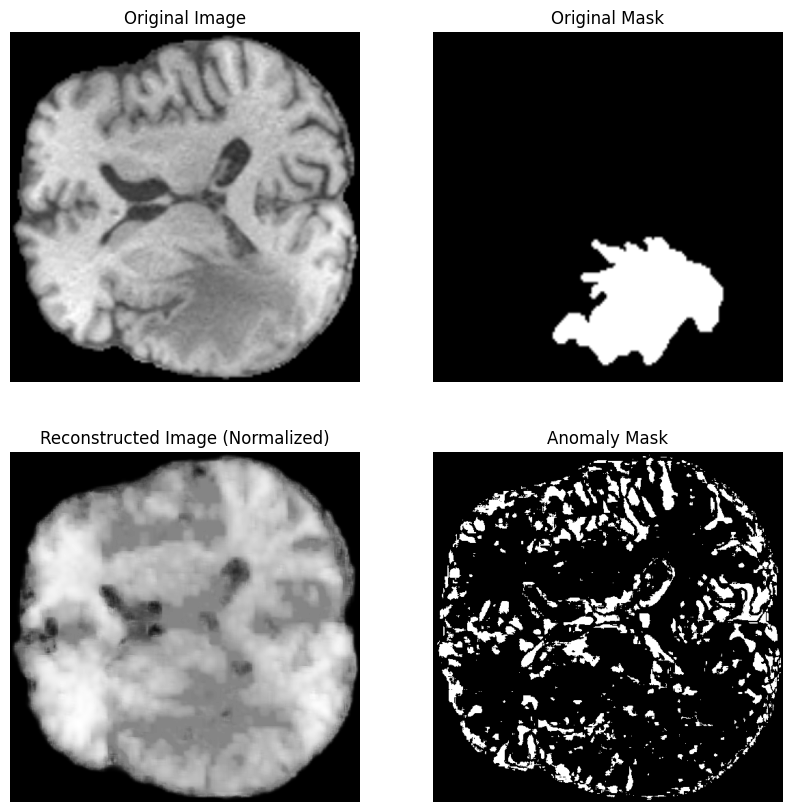

Processing Test Image 7/8...
Model weights reset.
  Adaptation Epoch 1/250 completed.
  Adaptation Epoch 2/250 completed.
  Adaptation Epoch 3/250 completed.
  Adaptation Epoch 4/250 completed.
  Adaptation Epoch 5/250 completed.
  Adaptation Epoch 6/250 completed.
  Adaptation Epoch 7/250 completed.
  Adaptation Epoch 8/250 completed.
  Adaptation Epoch 9/250 completed.
  Adaptation Epoch 10/250 completed.
  Adaptation Epoch 11/250 completed.
  Adaptation Epoch 12/250 completed.
  Adaptation Epoch 13/250 completed.
  Adaptation Epoch 14/250 completed.
  Adaptation Epoch 15/250 completed.
  Adaptation Epoch 16/250 completed.
  Adaptation Epoch 17/250 completed.
  Adaptation Epoch 18/250 completed.
  Adaptation Epoch 19/250 completed.
  Adaptation Epoch 20/250 completed.
  Adaptation Epoch 21/250 completed.
  Adaptation Epoch 22/250 completed.
  Adaptation Epoch 23/250 completed.
  Adaptation Epoch 24/250 completed.
  Adaptation Epoch 25/250 completed.
  Adaptation Epoch 26/250 complete

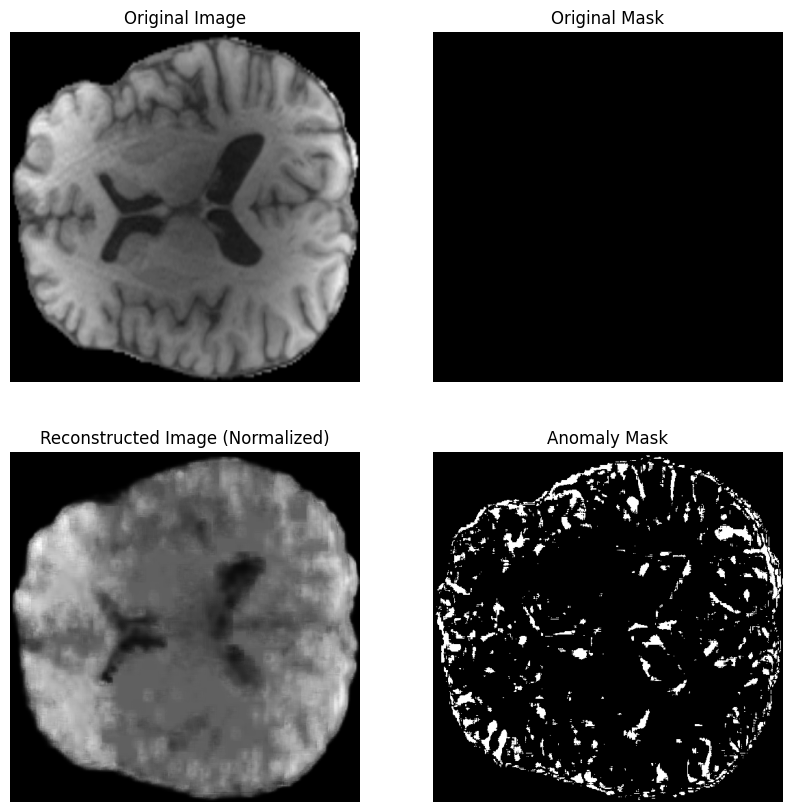

Processing Test Image 8/8...
Model weights reset.
  Adaptation Epoch 1/250 completed.
  Adaptation Epoch 2/250 completed.
  Adaptation Epoch 3/250 completed.
  Adaptation Epoch 4/250 completed.
  Adaptation Epoch 5/250 completed.
  Adaptation Epoch 6/250 completed.
  Adaptation Epoch 7/250 completed.
  Adaptation Epoch 8/250 completed.
  Adaptation Epoch 9/250 completed.
  Adaptation Epoch 10/250 completed.
  Adaptation Epoch 11/250 completed.
  Adaptation Epoch 12/250 completed.
  Adaptation Epoch 13/250 completed.
  Adaptation Epoch 14/250 completed.
  Adaptation Epoch 15/250 completed.
  Adaptation Epoch 16/250 completed.
  Adaptation Epoch 17/250 completed.
  Adaptation Epoch 18/250 completed.
  Adaptation Epoch 19/250 completed.
  Adaptation Epoch 20/250 completed.
  Adaptation Epoch 21/250 completed.
  Adaptation Epoch 22/250 completed.
  Adaptation Epoch 23/250 completed.
  Adaptation Epoch 24/250 completed.
  Adaptation Epoch 25/250 completed.
  Adaptation Epoch 26/250 complete

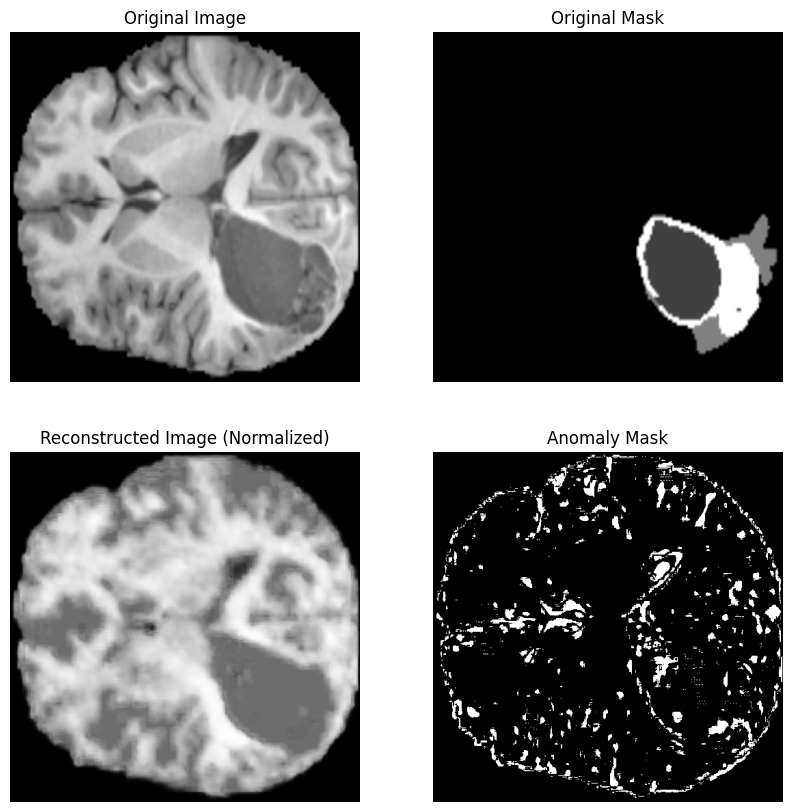

Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.4167
Jaccard Score (IoU): 0.0000


C:\Users\priya\anaconda3\envs\anacondagpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


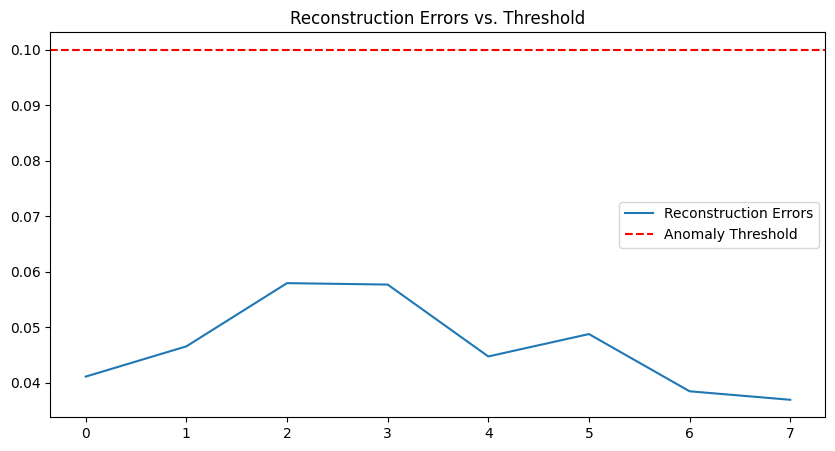

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, jaccard_score
from skimage.metrics import structural_similarity as ssim
from skimage.exposure import match_histograms
import os

# Normalize contrast between reconstructed and original images
from skimage.exposure import match_histograms

def normalize_contrast(original, reconstructed):
    # Match histograms without multichannel for single-channel images
    normalized = match_histograms(reconstructed, original)
    return normalized


# Calculate anomaly mask and reconstruction error
def calculate_anomaly_mask(original, reconstructed, error_threshold=0.2):
    reconstructed_normalized = normalize_contrast(original, reconstructed)
    reconstruction_error = np.abs(original - reconstructed_normalized)
    anomaly_mask = reconstruction_error > error_threshold
    return anomaly_mask, reconstruction_error

# Load and normalize a single image
def load_image(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (512, 512))
    image = np.expand_dims(image, axis=-1)
    image = image / 255.0
    return np.expand_dims(image, axis=0)

# Load test images and masks from directory
def load_images_and_labels_from_folder(folder_path):
    brain_images, segment_masks, true_labels = [], [], []
    image_files = sorted([f for f in os.listdir(folder_path) if f.endswith("_processed_image.png")])
    mask_files = sorted([f for f in os.listdir(folder_path) if f.endswith("_processed_mask.png")])

    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(folder_path, img_file)
        mask_path = os.path.join(folder_path, mask_file)

        image = load_image(img_path)
        mask = load_image(mask_path)

        brain_images.append(image)
        segment_masks.append(mask)
        true_labels.append(0 if np.all(mask == 0) else 1)

    return brain_images, segment_masks, true_labels

# Save initial model weights
def save_initial_weights(model):
    initial_weights = model.get_weights()
    return initial_weights

# Reset model weights to initial state
def reset_weights(model, initial_weights):
    model.set_weights(initial_weights)

# Evaluate VAE on test images
def train_and_evaluate_per_image(vae, test_images, test_masks, true_labels, threshold=0.3, epochs_per_image=5):
    reconstruction_errors, predictions = [], []

    # Save initial weights of the VAE model
    initial_weights = save_initial_weights(vae)

    for idx, (img, mask) in enumerate(zip(test_images, test_masks)):
        print(f"Processing Test Image {idx + 1}/{len(test_images)}...")

        # Reset model weights to initial state
        reset_weights(vae, initial_weights)
        print("Model weights reset.")

        # Fine-tune the model on the current image
        for epoch in range(epochs_per_image):
            vae.train_on_batch(img, img)
            print(f"  Adaptation Epoch {epoch + 1}/{epochs_per_image} completed.")

        # Predict reconstructed image
        reconstructed = vae.predict(img)

        # Calculate anomaly mask and reconstruction error
        anomaly_mask, error = calculate_anomaly_mask(img, reconstructed, error_threshold=0.1)
        reconstruction_errors.append(error.mean())

        # Classify as anomalous based on reconstruction error
        anomaly_prediction = error.mean() > threshold
        predictions.append(anomaly_prediction)

        # Visualize original image, mask, reconstruction, and anomaly mask
        plt.figure(figsize=(10, 10))
        plt.subplot(2, 2, 1)
        plt.imshow(np.squeeze(img), cmap='gray')
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(2, 2, 2)
        plt.imshow(np.squeeze(mask), cmap='gray')
        plt.title("Original Mask")
        plt.axis("off")

        plt.subplot(2, 2, 3)
        plt.imshow(np.squeeze(reconstructed), cmap='gray')
        plt.title("Reconstructed Image (Normalized)")
        plt.axis("off")

        plt.subplot(2, 2, 4)
        plt.imshow(np.squeeze(anomaly_mask), cmap='gray')
        plt.title("Anomaly Mask")
        plt.axis("off")
        plt.show()

    # Calculate metrics
    reconstruction_errors = np.array(reconstruction_errors).flatten()
    predictions = np.array(predictions).flatten()

    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    roc_auc = roc_auc_score(true_labels, reconstruction_errors)
    jaccard = jaccard_score(true_labels, predictions, average="binary")

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Jaccard Score (IoU): {jaccard:.4f}")

    return predictions, reconstruction_errors

# Example usage
folder_path = "test_cropped"
test_images, test_masks, true_labels = load_images_and_labels_from_folder(folder_path)

# Load VAE (assuming build_vae is defined elsewhere)
vae, encoder, decoder = build_vae(input_shape=(512, 512, 1))
vae.load_weights("vae_model_epoch_2000.h5")

# Set anomaly threshold and fine-tuning epochs per image
anomaly_threshold = 0.1
epochs_per_image = 250

# Evaluate model
predictions, reconstruction_errors = train_and_evaluate_per_image(
    vae, test_images, test_masks, true_labels, anomaly_threshold, epochs_per_image
)

# Plot reconstruction errors
plt.figure(figsize=(10, 5))
plt.plot(reconstruction_errors, label="Reconstruction Errors")
plt.axhline(y=anomaly_threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.legend()
plt.title("Reconstruction Errors vs. Threshold")
plt.show()
